In [1]:
#Lets start with importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("diabetes.csv") #Reading the data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.shape

(768, 9)

In [5]:
#replacing zero values with the mean of the column

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

data ['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())

data ['Glucose'] = data ['Glucose'].replace(0,data['Glucose'].mean())

data ['Insulin'] = data ['Insulin'].replace(0,data['Insulin'].mean())

data ['SkinThickness'] = data ['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


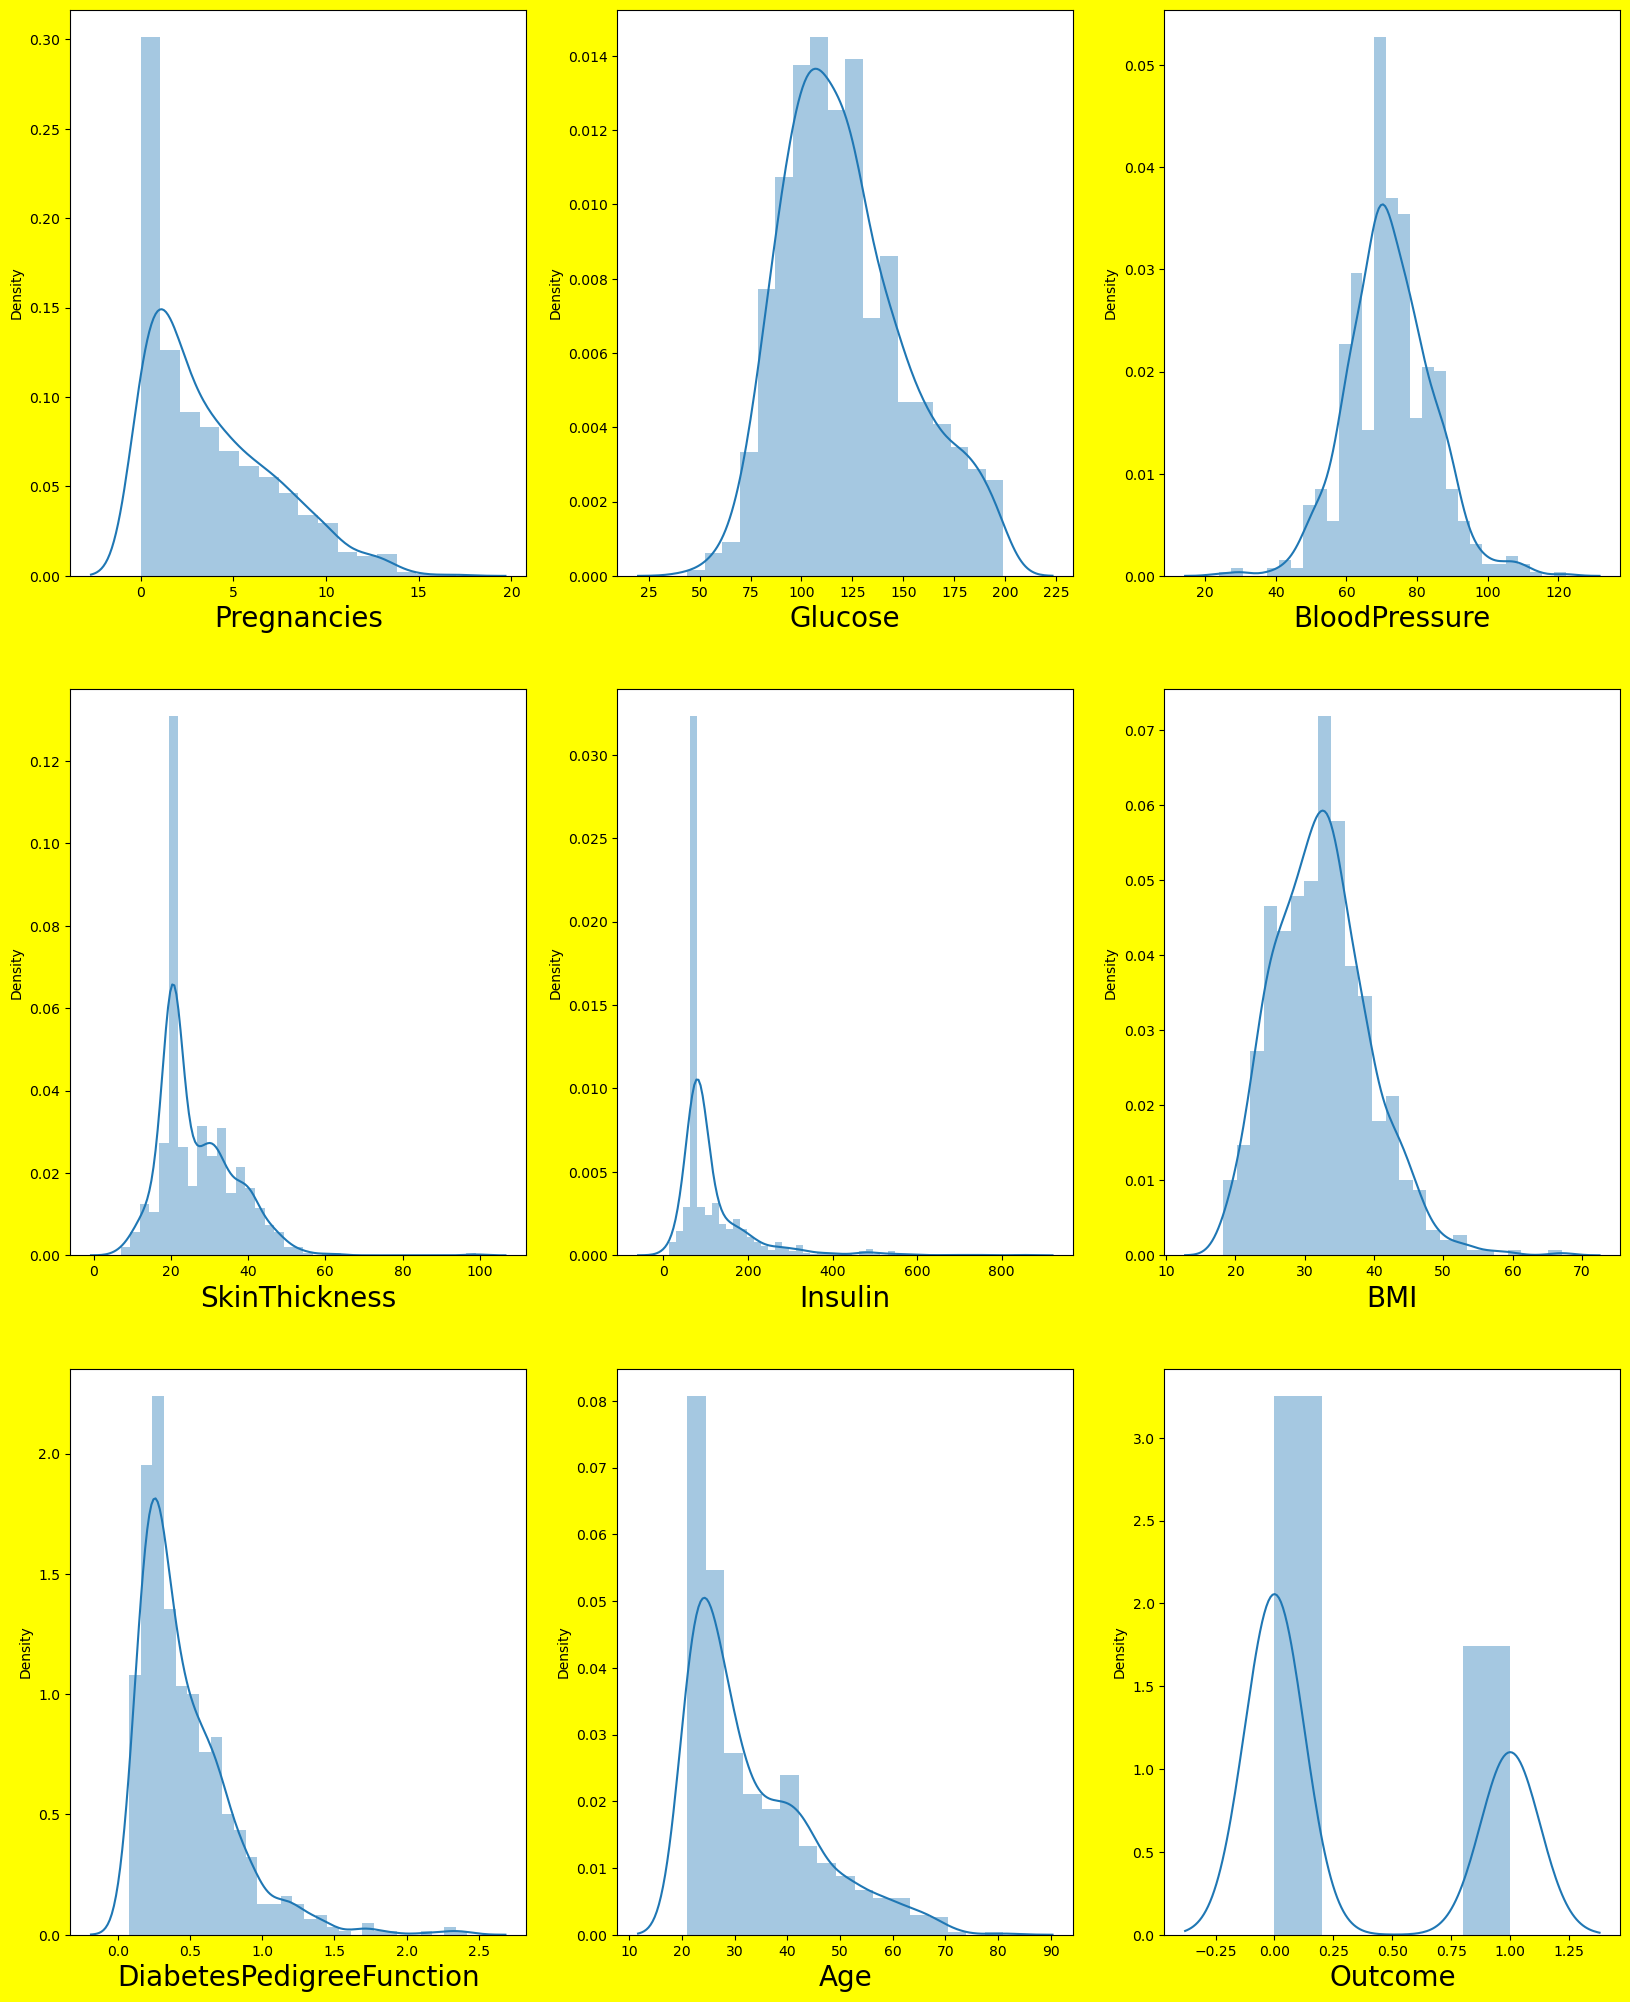

In [7]:
#Lets see how data is distributed for every column

plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [8]:
df_features = data.drop('Outcome',axis=1)

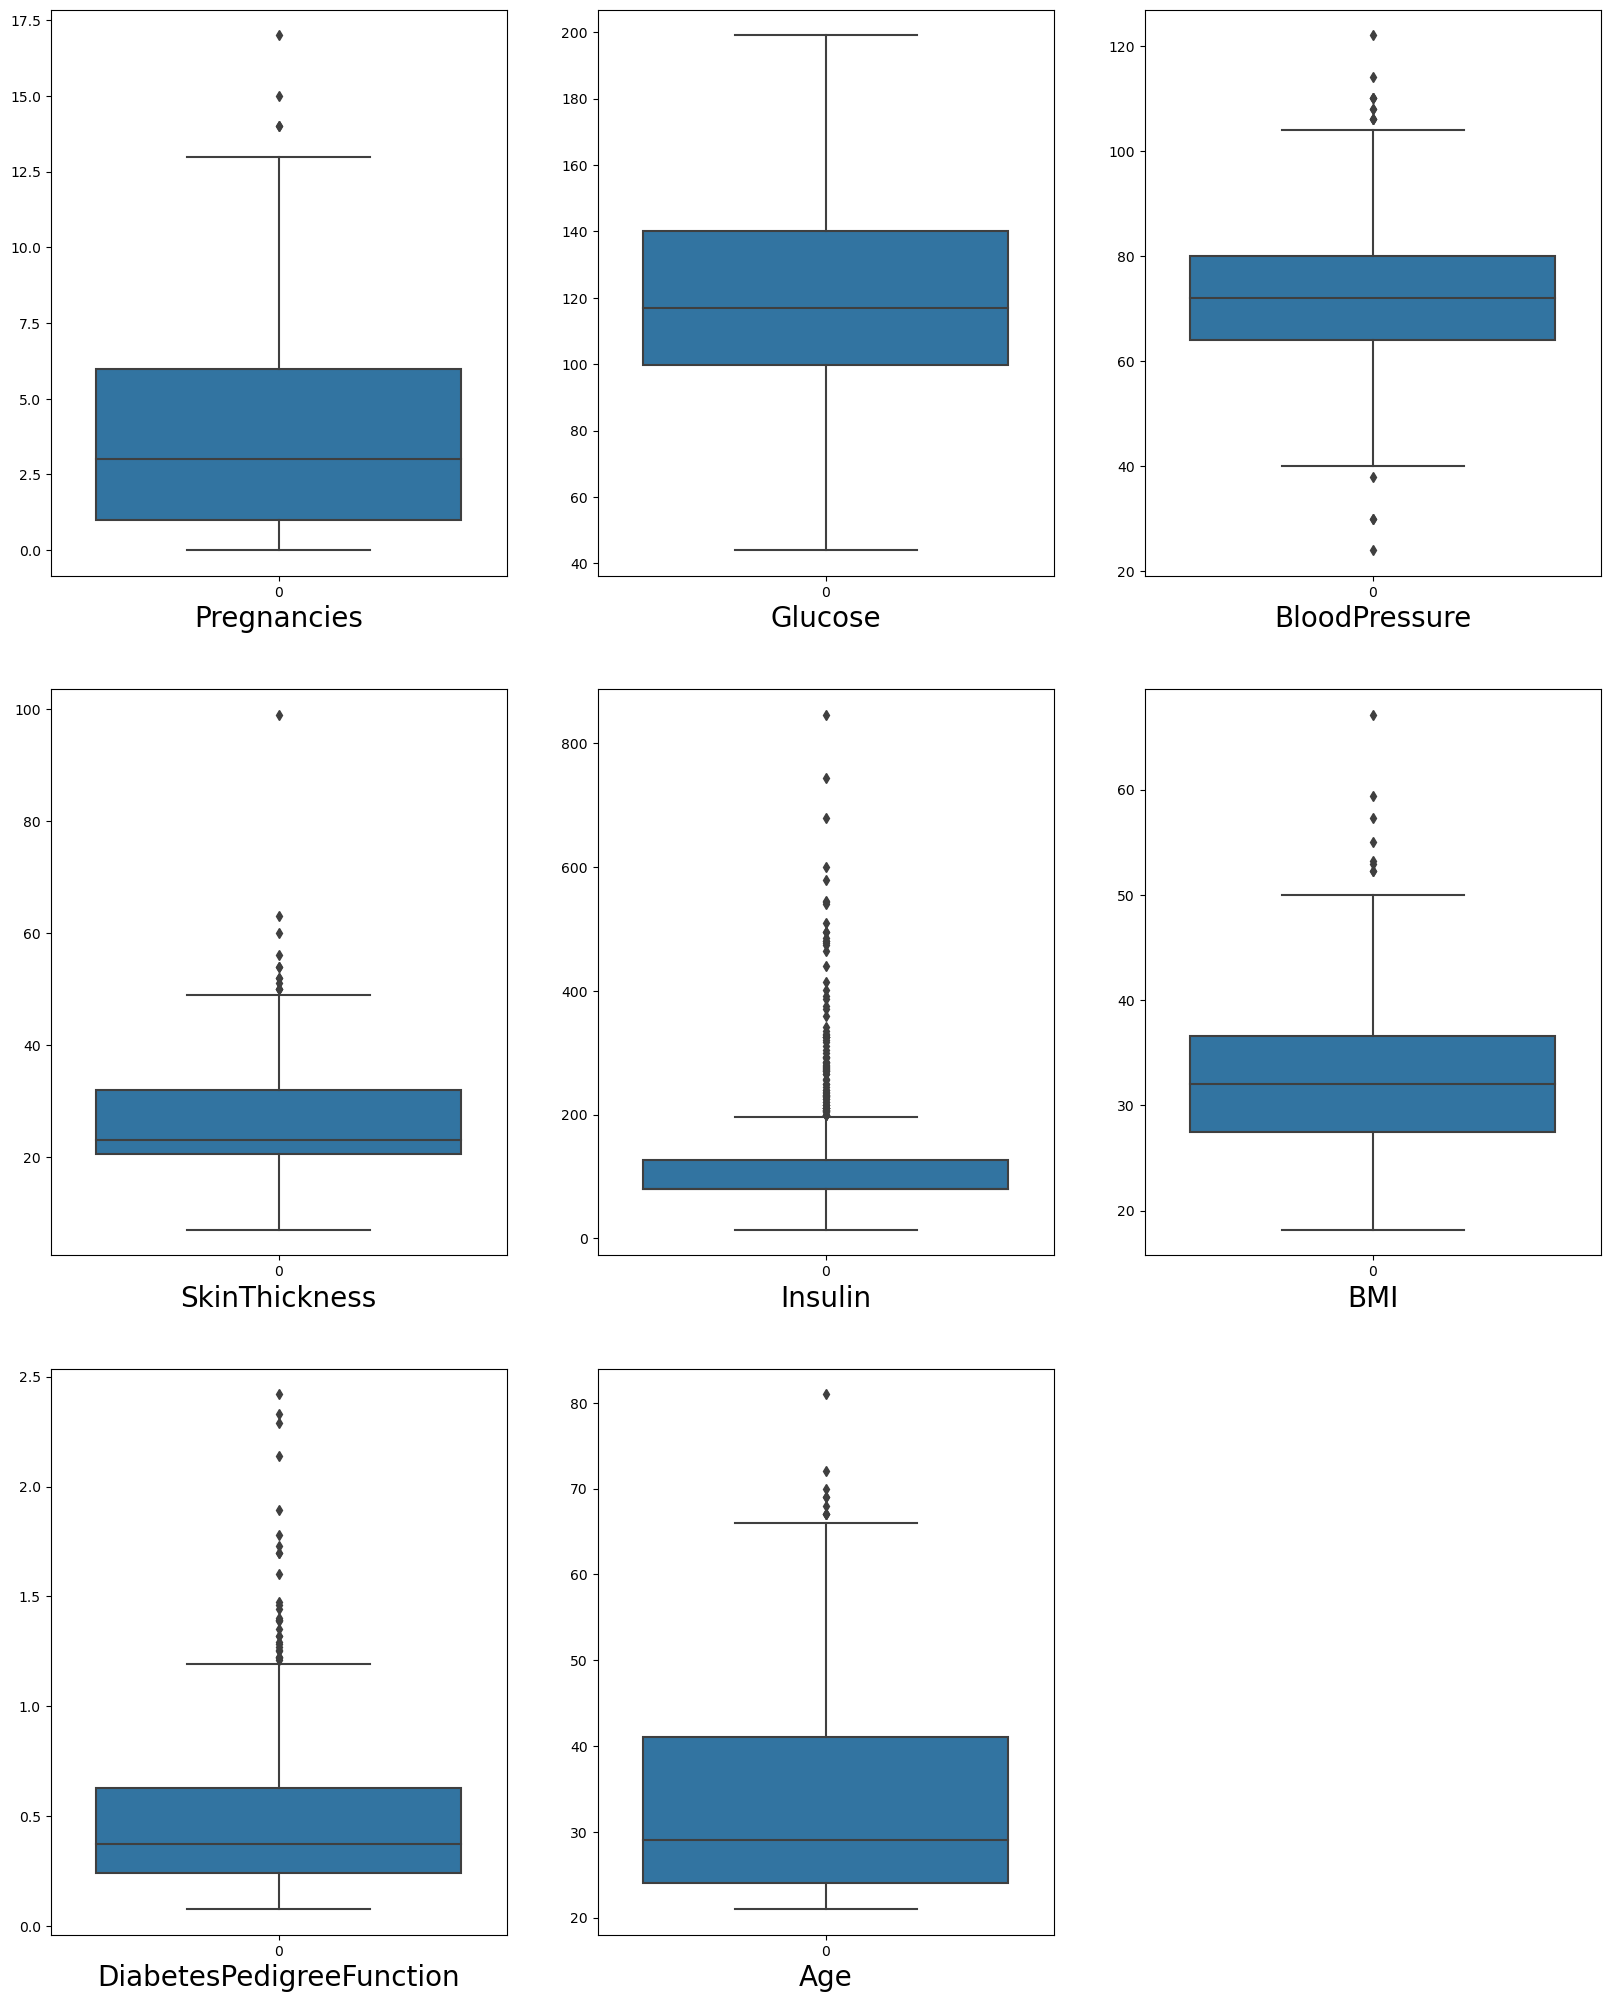

In [9]:
#Visualize the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in df_features:
    if graph<=9:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

In [10]:
data.shape

(768, 9)

In [11]:
#Find the Interquartile range to find the outliers

#1st quarantile
q1 = data.quantile(0.25)

#3rd quarantile
q3 = data.quantile(0.75)

#IQR
iqr = q3-q1

In [12]:
q1

Pregnancies                  1.000000
Glucose                     99.750000
BloodPressure               64.000000
SkinThickness               20.536458
Insulin                     79.799479
BMI                         27.500000
DiabetesPedigreeFunction     0.243750
Age                         24.000000
Outcome                      0.000000
Name: 0.25, dtype: float64

In [13]:
#validating one outlier
preg_high = (q3.Pregnancies + (1.5 * iqr.Pregnancies))
preg_high

13.5

In [14]:
#Check the indexes which have higher values
np_index = np.where(data['Pregnancies']>preg_high)
np_index

(array([ 88, 159, 298, 455], dtype=int64),)

In [15]:
#drop the index which we found in the above cell
data = data.drop(data.index[np_index])
data.shape

(764, 9)

In [16]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
bp_high = q3.BloodPressure + (1.5 * iqr.BloodPressure)
print (bp_high)

index = np.where(data['BloodPressure']>bp_high)

data=data.drop(data.index[index])
data.shape

print(data.shape)

data.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [19]:
glu_high = q3.Glucose + (1.5 * iqr.Glucose)
print (glu_high)

index = np.where(data['Glucose']>glu_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

201.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
sku_high = q3.SkinThickness + (1.5 * iqr.SkinThickness)
print (sku_high)

index = np.where(data['SkinThickness']>sku_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
insu_high = q3.Insulin + (1.5 * iqr.Insulin)
print (insu_high)

index = np.where(data['Insulin']>insu_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
bm_high = q3.BMI + (1.5 * iqr.BMI)
print (bm_high)

index = np.where(data['BMI']>bm_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

50.25
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
dbp_high = q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction)
print (dbp_high)

index = np.where(data['DiabetesPedigreeFunction']>dbp_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.2
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [24]:
age_high = q3.Age + (1.5 * iqr.Age)
print (age_high)

index = np.where(data['Age']>age_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

66.5
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [25]:
bp_low = q1.BloodPressure - (1.5 * iqr.BloodPressure)
print (bp_low)

index = np.where(data['BloodPressure']<bp_low)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

40.0
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


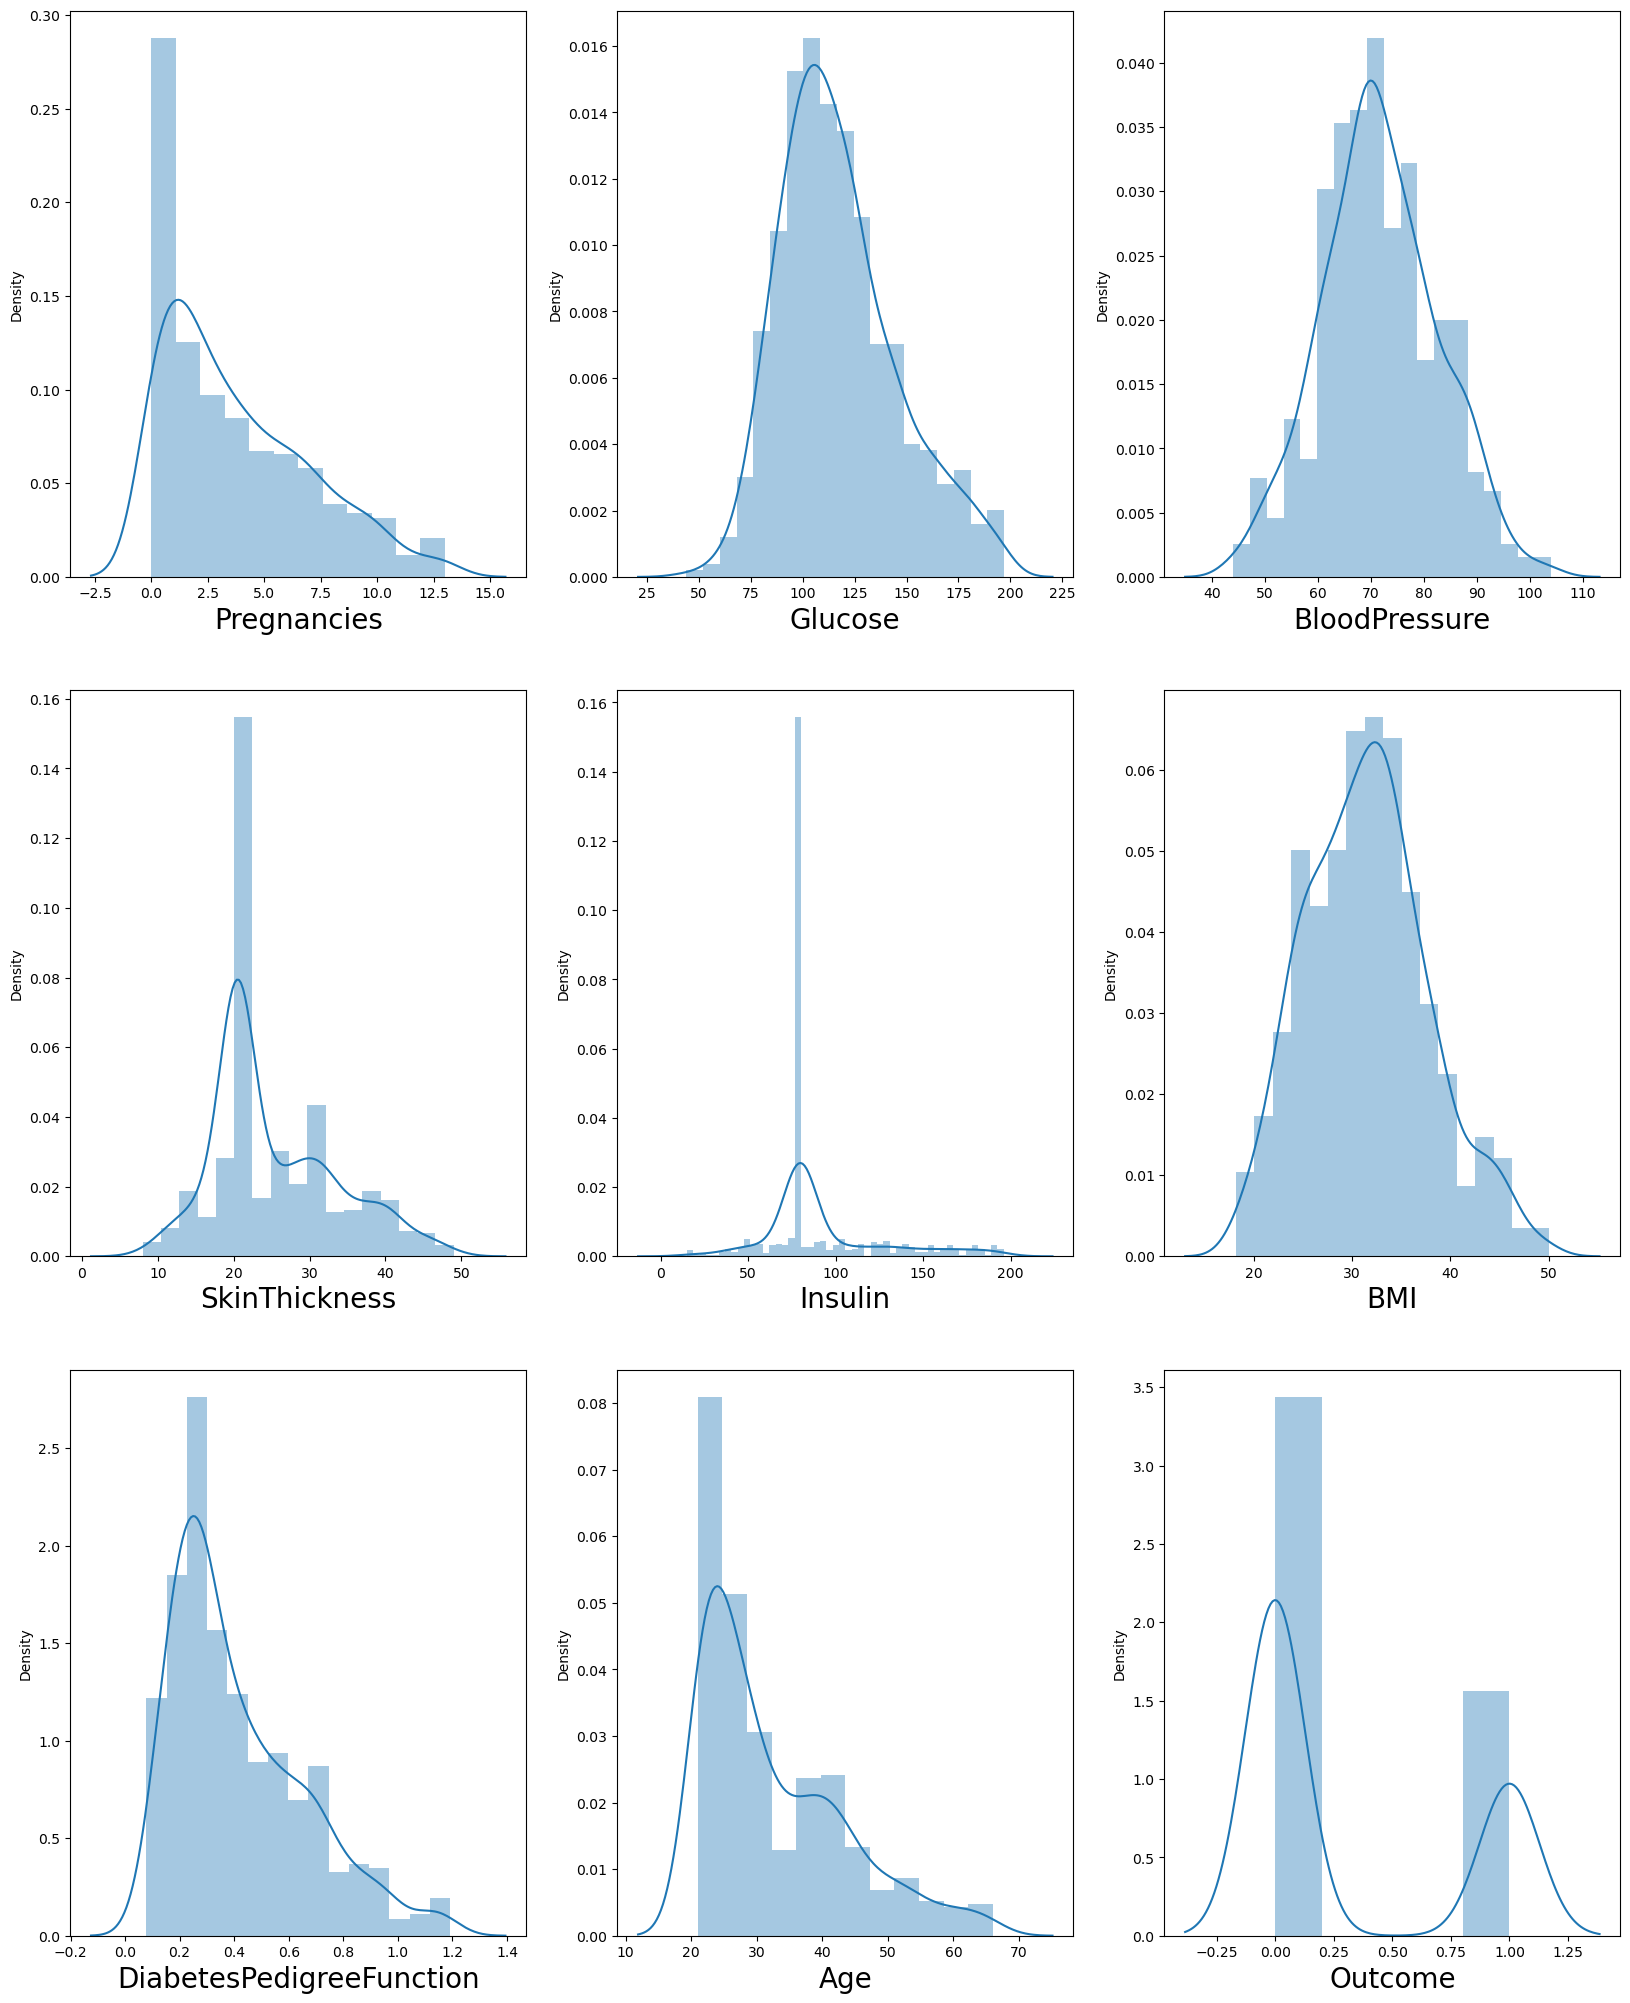

In [26]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.show()

In [27]:
x = data.drop(columns='Outcome')
y = data['Outcome']

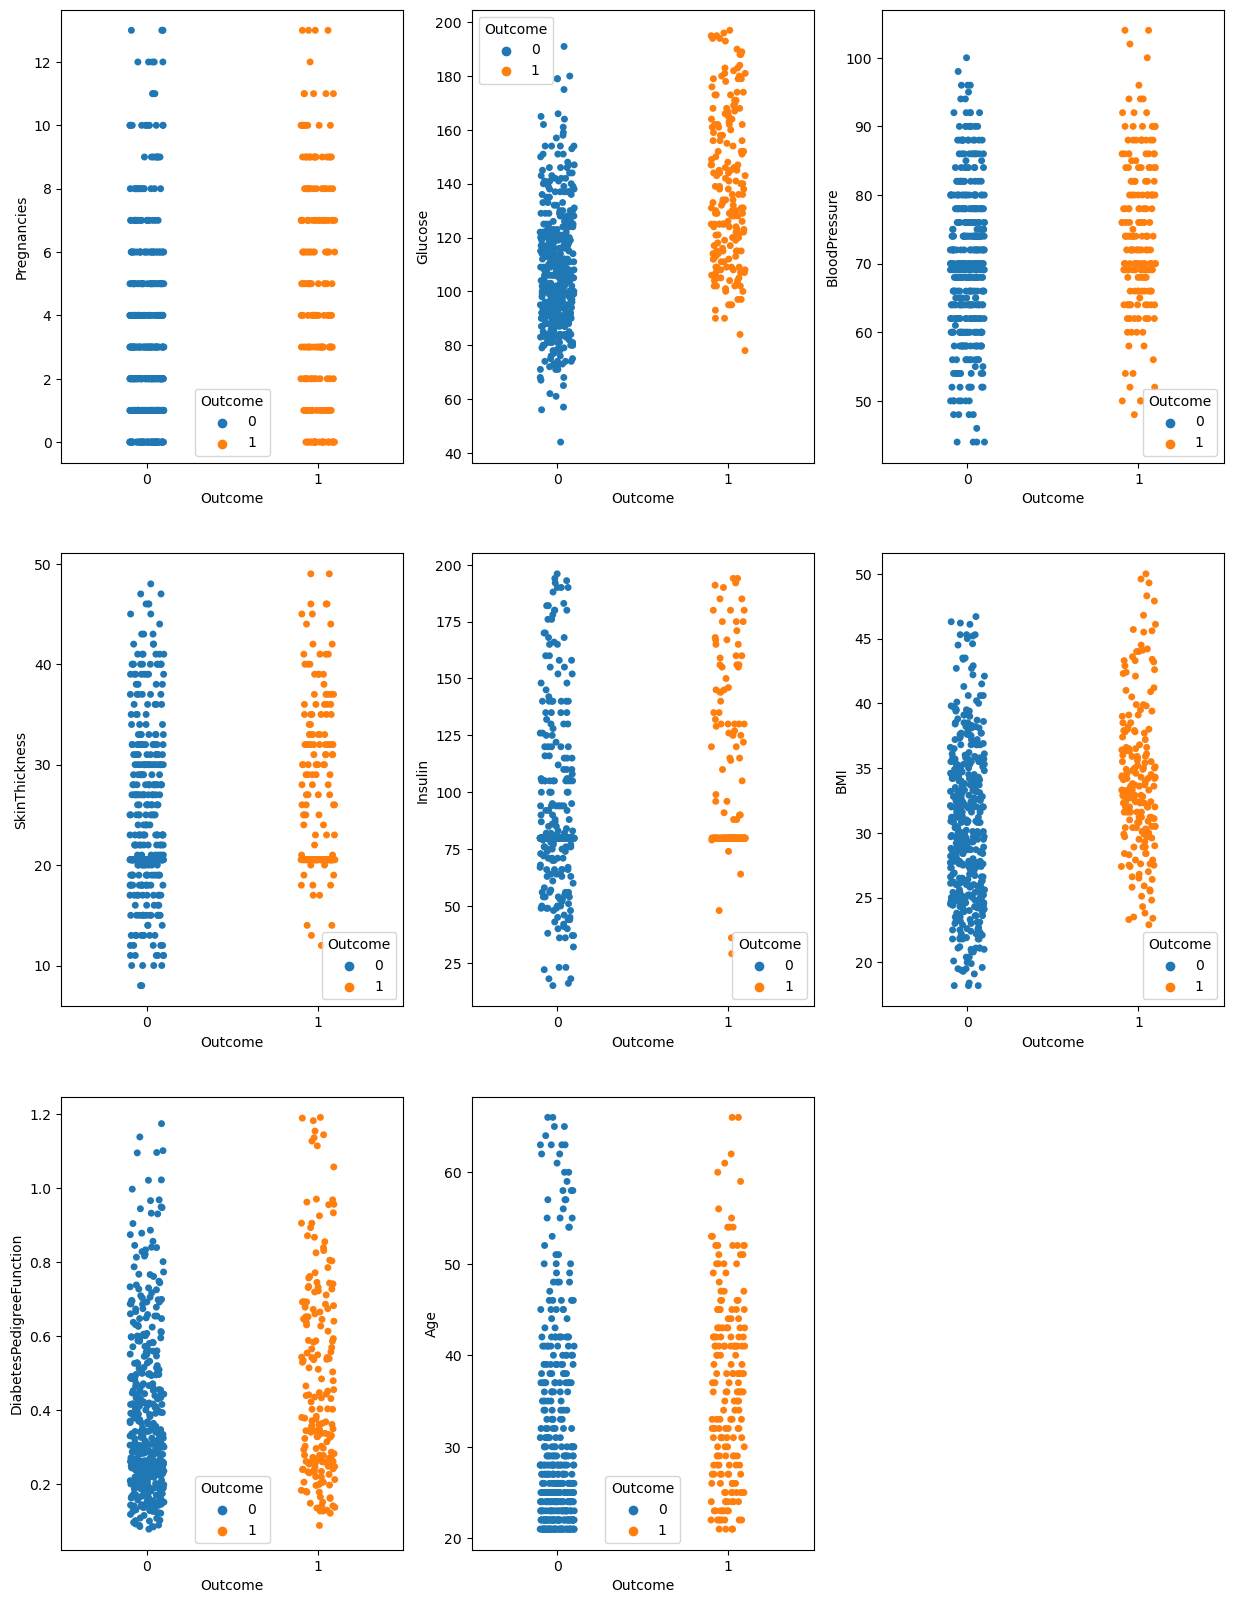

In [28]:
#Lets see how features are related to class

plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=x[column],hue=y)
        
    plotnumber+=1
plt.show()

In [29]:
scalar = StandardScaler()

x_scaled = scalar.fit_transform(x)

In [30]:
x_scaled

array([[ 0.68261737,  1.09175498,  0.03430374, ...,  0.3291024 ,
         0.86092316,  1.59493212],
       [-0.86628347, -1.14945302, -0.51362487, ..., -0.79544459,
        -0.26714798, -0.1367884 ],
       [ 1.3021777 ,  2.33687054, -0.69626775, ..., -1.32558817,
         1.0448478 , -0.04564521],
       ...,
       [ 0.3728372 ,  0.13123727,  0.03430374, ..., -0.85970442,
        -0.7003927 , -0.22793158],
       [-0.86628347,  0.30911092, -1.06155349, ..., -0.2331711 ,
        -0.27532241,  1.32150256],
       [-0.86628347, -0.86485518, -0.14833913, ..., -0.18497622,
        -0.4142877 , -0.86593388]])

In [31]:
x_scaled.shape[1]

8

In [32]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1]) ]
vif['Features'] = x.columns

#Lets check the values
vif

,vif,Features
0,1.448654,Pregnancies
1,1.250247,Glucose
2,1.258898,BloodPressure
3,1.411508,SkinThickness
4,1.200759,Insulin
5,1.447599,BMI
6,1.038530,DiabetesPedigreeFunction
7,1.659799,Age


In [33]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 355)

In [34]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [35]:
y_pred = log_reg.predict(x_test)

In [36]:
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0], dtype=int64)

In [38]:
log_reg.predict_proba(x_test)

array([[0.27644852, 0.72355148],
       [0.9884465 , 0.0115535 ],
       [0.71320913, 0.28679087],
       [0.41727663, 0.58272337],
       [0.65256166, 0.34743834],
       [0.16747081, 0.83252919],
       [0.67217673, 0.32782327],
       [0.96760466, 0.03239534],
       [0.83090765, 0.16909235],
       [0.70960968, 0.29039032],
       [0.61236335, 0.38763665],
       [0.82448072, 0.17551928],
       [0.55924335, 0.44075665],
       [0.52295435, 0.47704565],
       [0.25325268, 0.74674732],
       [0.97019571, 0.02980429],
       [0.49845311, 0.50154689],
       [0.91072363, 0.08927637],
       [0.97768536, 0.02231464],
       [0.64897542, 0.35102458],
       [0.52870881, 0.47129119],
       [0.78479246, 0.21520754],
       [0.78466007, 0.21533993],
       [0.44685677, 0.55314323],
       [0.75832183, 0.24167817],
       [0.35577336, 0.64422664],
       [0.69081478, 0.30918522],
       [0.62136906, 0.37863094],
       [0.94699644, 0.05300356],
       [0.64984246, 0.35015754],
       [0.

In [39]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

In [40]:
#Confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[94, 11],
       [26, 24]], dtype=int64)

In [41]:
(94+24)/(94+24+11+26)

0.7612903225806451

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.69      0.48      0.56        50

    accuracy                           0.76       155
   macro avg       0.73      0.69      0.70       155
weighted avg       0.75      0.76      0.75       155



In [44]:
#ROC Curve
fpr,tpr, thresholds = roc_curve(y_test,y_pred) 

In [45]:
#treshold [0] means no instances predicted (It should be read from 0 - max)
print('Threshold = ', thresholds)
print('True Positice Rate = ', tpr)
print('False Positive Rate = ', fpr)

Threshold =  [2 1 0]
True Positice Rate =  [0.   0.48 1.  ]
False Positive Rate =  [0.        0.1047619 1.       ]


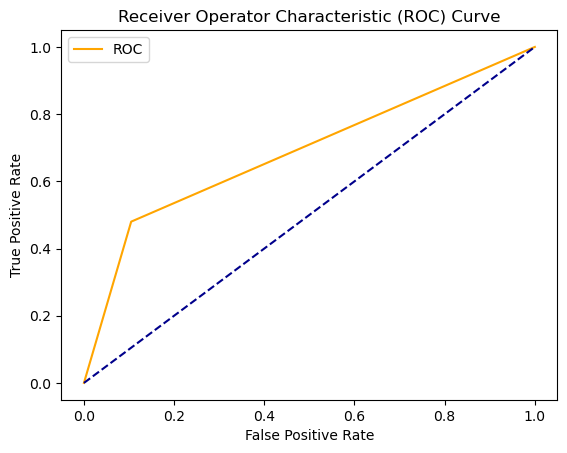

In [49]:
plt.plot(fpr, tpr, color='orange', label = 'ROC')
plt.plot([0, 1], [0,1], color='darkblue', linestyle= '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [50]:
#How much area it is covering
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.6876190476190477
